## &#x1F310; &nbsp; Code Library, Style, and Links

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
body {background-color: gainsboro;} 
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #37c9e1; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: slategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #818286; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #aaa;}
div.output_prompt, div.output_area pre {color: slategray;}
div.input_prompt, div.output_subarea {color: #37c9e1;}      
div.output_stderr pre {background-color: gainsboro;}  
div.output_stderr {background-color: slategrey;}       
</style>

In [84]:
import numpy as np 
import pandas as pd

import matplotlib.pylab as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

## &#x1F310; &nbsp; Load and Preprocess the Data

In [231]:
school_explorer = pd.read_csv('2016 School Explorer.csv')
d5_shsat = pd.read_csv('D5 SHSAT Registrations and Testers.csv')
school_explorer.shape, d5_shsat.shape

((1272, 161), (140, 7))

In [232]:
# Fillna or replace values
school_explorer = school_explorer.drop(['Adjusted Grade',
                                        'New?',
                                        'Other Location Code in LCGMS'], 
                                       axis=1)
school_explorer.loc[[427,1023,712,908],'School Name'] = \
['P.S. 212 D12','P.S. 212 D30','P.S. 253 D21','P.S. 253 D27']

percent_list = ['Percent ELL','Percent Asian','Percent Black',
                'Percent Hispanic','Percent Black / Hispanic',
                'Percent White','Student Attendance Rate',
                'Percent of Students Chronically Absent',
                'Rigorous Instruction %','Collaborative Teachers %',
                'Supportive Environment %','Effective School Leadership %',
                'Strong Family-Community Ties %','Trust %']

for el in percent_list:
    school_explorer[el] = school_explorer[el].astype('str')
    school_explorer[el] = school_explorer[el].str.replace("%", "")
    school_explorer[el] = school_explorer[el].str.replace("nan", "0")
    school_explorer[el] = school_explorer[el].astype(float)
    school_explorer[el].replace(0, np.NaN, inplace=True)
    school_explorer[el] = school_explorer[el].interpolate()
    
school_explorer['Economic Need Index'] = \
school_explorer['Economic Need Index'].interpolate()
school_explorer['Average ELA Proficiency'] = \
school_explorer['Average ELA Proficiency'].interpolate()
school_explorer['Average Math Proficiency'] = \
school_explorer['Average Math Proficiency'].interpolate()

school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].astype('str') 
for s in [",","$"," "]:
    school_explorer['School Income Estimate'] = \
    school_explorer['School Income Estimate'].str.replace(s, "")
school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].str.replace("nan", "0")

school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].astype(float)
school_explorer['School Income Estimate'].replace(0, np.NaN, inplace=True)
school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].interpolate()

rating_list = ['Rigorous Instruction Rating','Collaborative Teachers Rating',
               'Supportive Environment Rating','Effective School Leadership Rating',
               'Strong Family-Community Ties Rating','Strong Family-Community Ties Rating',
               'Trust Rating','Student Achievement Rating']

for el in rating_list:
    moda_value = school_explorer[el].value_counts().idxmax()
    school_explorer[el] = school_explorer[el].fillna(moda_value) 
    
print('NaN count = ', sum(school_explorer.isna().sum()))    

NaN count =  0


In [233]:
# Describe numeric variables
school_explorer.describe(include=[np.number]).T.head(23)

,count,mean,std,min,25%,50%,75%,max
SED Code,1272.0,3.286698e+11,1.222022e+10,3.075000e+11,3.208752e+11,3.315004e+11,3.424000e+11,3.531009e+11
District,1272.0,1.613522e+01,9.245270e+00,1.000000e+00,9.000000e+00,1.500000e+01,2.400000e+01,3.200000e+01
Latitude,1272.0,4.073454e+01,8.660234e-02,4.050780e+01,4.066950e+01,4.072299e+01,4.081563e+01,4.090346e+01
Longitude,1272.0,-7.391835e+01,8.057649e-02,-7.424402e+01,-7.395706e+01,-7.392057e+01,-7.387926e+01,-7.370892e+01
Zip,1272.0,1.081572e+04,5.295889e+02,1.000100e+04,1.045200e+04,1.120300e+04,1.123200e+04,1.169400e+04
Economic Need Index,1272.0,6.719953e-01,2.095183e-01,4.900000e-02,5.510000e-01,7.282500e-01,8.400000e-01,9.570000e-01
School Income Estimate,1272.0,4.801374e+04,2.100769e+04,1.690167e+04,3.338110e+04,4.357179e+04,5.778292e+04,1.813821e+05
Percent ELL,1272.0,1.266392e+01,1.124188e+01,1.000000e+00,4.000000e+00,9.000000e+00,1.800000e+01,9.900000e+01
Percent Asian,1272.0,1.197720e+01,1.748867e+01,1.000000e+00,1.500000e+00,4.000000e+00,1.400000e+01,9.500000e+01
Percent Black,1272.0,3.210299e+01,2.871480e+01,1.000000e+00,7.000000e+00,2.400000e+01,5.525000e+01,9.700000e+01


In [234]:
school_explorer.describe(include=[np.object]).T

,count,unique,top,freq
School Name,1272,1272,P.S. 134 GEORGE F. BRISTOW,1
Location Code,1272,1272,12X047,1
Address (Full),1272,1091,"3750 BAYCHESTER AVE BRONX, NY 10466",3
City,1272,45,BROOKLYN,411
Grades,1272,41,"PK,0K,01,02,03,04,05",400
Grade Low,1272,10,PK,525
Grade High,1272,11,05,626
Community School?,1272,2,No,1196
Rigorous Instruction Rating,1272,4,Meeting Target,629
Collaborative Teachers Rating,1272,4,Meeting Target,651


In [235]:
numeric_list1 = school_explorer.describe(include=[np.number]).columns[:23]
numeric_list2 = school_explorer.describe(include=[np.number]).columns[23:]
object_list = school_explorer.describe(include=[np.object]).columns

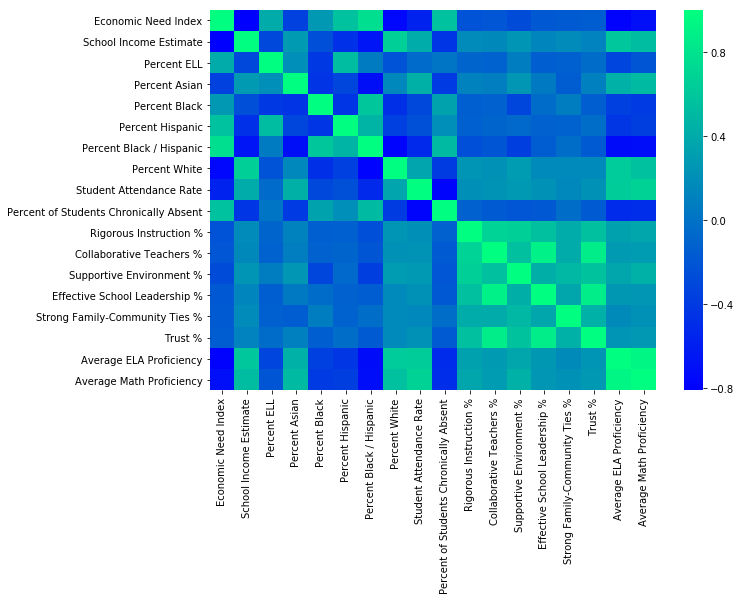

In [236]:
corr_martix = school_explorer[numeric_list1[5:23]].corr()
fig,ax = plt.subplots(1, figsize=(10,7))
sns.heatmap(corr_martix, ax=ax,
            xticklabels=corr_martix.columns.values,
            yticklabels=corr_martix.columns.values,
            cmap="winter");

Of course, the variables `SED Code`, `District`, `Zip` are categorical. 

Just categories are denoted by numeric values.

Let's convert string values of other categorical features into numeric.

In [237]:
print('District: ',set(school_explorer['District']),'\n')
print('City: ',set(school_explorer['City']),'\n')
print('Grades: ',set(school_explorer['Grades']),'\n')
print('Community School?: ',set(school_explorer['Community School?']),'\n')
print('Rigorous Instruction Rating: ',set(school_explorer['Rigorous Instruction Rating']),'\n')
print('Collaborative Teachers Rating: ',set(school_explorer['Collaborative Teachers Rating']),'\n')
print('Supportive Environment Rating: ',set(school_explorer['Supportive Environment Rating']),'\n')
print('Effective School Leadership Rating: ',set(school_explorer['Effective School Leadership Rating']),'\n')
print('Strong Family-Community Ties Rating: ',set(school_explorer['Strong Family-Community Ties Rating']),'\n')
print('Trust Rating: ',set(school_explorer['Trust Rating']),'\n')
print('Student Achievement Rating: ',set(school_explorer['Student Achievement Rating']),'\n')

District:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32} 

City:  {'NEW YORK', 'ROOSEVELT ISLAND', 'KEW GARDENS', 'SPRINGFIELD GARDENS', 'HOLLIS', 'JACKSON HEIGHTS', 'EAST ELMHURST', 'ASTORIA', 'JAMAICA', 'BELLEROSE', 'LITTLE NECK', 'SOUTH OZONE PARK', 'OZONE PARK', 'WHITESTONE', 'REGO PARK', 'ARVERNE', 'STATEN ISLAND', 'ROCKAWAY PARK', 'GLENDALE', 'COLLEGE POINT', 'ELMHURST', 'WOODSIDE', 'BROOKLYN', 'FLUSHING', 'QUEENS VILLAGE', 'HOWARD BEACH', 'FAR ROCKAWAY', 'RIDGEWOOD', 'SOUTH RICHMOND HILL', 'ROCKAWAY BEACH', 'CAMBRIA HEIGHTS', 'BROAD CHANNEL', 'SAINT ALBANS', 'BRONX', 'CORONA', 'RICHMOND HILL', 'MASPETH', 'LONG ISLAND CITY', 'DOUGLASTON', 'FOREST HILLS', 'FLORAL PARK', 'BAYSIDE', 'ROSEDALE', 'MIDDLE VILLAGE', 'WOODHAVEN'} 

Grades:  {'PK,0K,01,02', '02,03,04,05', 'PK,0K,01,02,03,04,05,07,08', 'PK,0K,01,03,04,05', '0K', '0K,01,03,04,05,06,07,08', '0K,01,02,03,04,05,06,07', '0K,01,02,03,04,05,06,07,08', 'PK,0

In [238]:
category_list1 = ['District','Community School?','City','Grades']
                  
category_list2 = ['Rigorous Instruction Rating',
                 'Collaborative Teachers Rating',
                 'Supportive Environment Rating',
                 'Effective School Leadership Rating',
                 'Strong Family-Community Ties Rating',
                 'Trust Rating','Student Achievement Rating']

for feature in category_list1:
    feature_cat = pd.factorize(school_explorer[feature])
    school_explorer[feature] = feature_cat[0]
    
for feature in category_list2:
    feature_pairs = dict(zip(['Not Meeting Target', 'Meeting Target', 
                              'Approaching Target', 'Exceeding Target'],
                             ['0','2','1','3']))
    school_explorer[feature].replace(feature_pairs,inplace=True)
    school_explorer[feature] = school_explorer[feature].astype(int)

In [239]:
category_list = list(category_list1+category_list2)
numeric_list = list(numeric_list1[5:21].append(numeric_list2))
print(category_list, '\n', numeric_list )

['District', 'Community School?', 'City', 'Grades', 'Rigorous Instruction Rating', 'Collaborative Teachers Rating', 'Supportive Environment Rating', 'Effective School Leadership Rating', 'Strong Family-Community Ties Rating', 'Trust Rating', 'Student Achievement Rating'] 
 ['Economic Need Index', 'School Income Estimate', 'Percent ELL', 'Percent Asian', 'Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 'Rigorous Instruction %', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %', 'Grade 3 ELA - All Students Tested', 'Grade 3 ELA 4s - All Students', 'Grade 3 ELA 4s - American Indian or Alaska Native', 'Grade 3 ELA 4s - Black or African American', 'Grade 3 ELA 4s - Hispanic or Latino', 'Grade 3 ELA 4s - Asian or Pacific Islander', 'Grade 3 ELA 4s - White', 'Grade 3 ELA 4s - Multiracial', 'Grade 3 ELA 4s - Lim

In [240]:
print('District: ',set(school_explorer['District']),'\n')
print('City: ',set(school_explorer['City']),'\n')
print('Grades: ',set(school_explorer['Grades']),'\n')
print('Community School?: ',set(school_explorer['Community School?']),'\n')
print('Rigorous Instruction Rating: ',set(school_explorer['Rigorous Instruction Rating']),'\n')
print('Collaborative Teachers Rating: ',set(school_explorer['Collaborative Teachers Rating']),'\n')
print('Supportive Environment Rating: ',set(school_explorer['Supportive Environment Rating']),'\n')
print('Effective School Leadership Rating: ',set(school_explorer['Effective School Leadership Rating']),'\n')
print('Strong Family-Community Ties Rating: ',set(school_explorer['Strong Family-Community Ties Rating']),'\n')
print('Trust Rating: ',set(school_explorer['Trust Rating']),'\n')
print('Student Achievement Rating: ',set(school_explorer['Student Achievement Rating']),'\n')

District:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31} 

City:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44} 

Grades:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40} 

Community School?:  {0, 1} 

Rigorous Instruction Rating:  {0, 1, 2, 3} 

Collaborative Teachers Rating:  {0, 1, 2, 3} 

Supportive Environment Rating:  {0, 1, 2, 3} 

Effective School Leadership Rating:  {0, 1, 2, 3} 

Strong Family-Community Ties Rating:  {0, 1, 2, 3} 

Trust Rating:  {0, 1, 2, 3} 

Student Achievement Rating:  {0, 1, 2, 3} 



## &#x1F310; &nbsp; Clustering

In [287]:
# By education results and economic indicators
X = school_explorer[['Average ELA Proficiency',
                     'Average Math Proficiency',
                     'Economic Need Index',
                     'School Income Estimate']]
n = 10

clf = KMeans(n_clusters=n,random_state=23)
cluster_labels = clf.fit_predict(np.array(X))
school_explorer['Education Clusters'] = cluster_labels

In [288]:
X.groupby(school_explorer['Education Clusters']).mean()\
.sort_values('Average Math Proficiency')

,Average ELA Proficiency,Average Math Proficiency,Economic Need Index,School Income Estimate
Education Clusters,,,,
6,2.305474,2.392727,0.859856,25823.849714
0,2.383886,2.496865,0.809264,33640.056299
7,2.435935,2.583297,0.750129,40172.883524
2,2.519343,2.660646,0.678411,47186.936547
9,2.629638,2.801776,0.581355,56385.439017
5,2.717265,2.854419,0.483175,66064.988282
1,2.904886,3.083523,0.353943,77967.676254
4,2.968430,3.165988,0.353188,94914.645442
8,3.321765,3.482647,0.197471,116097.152882


Let's arrange these clusters in accordance with educational achievements.

In [289]:
indices = list(X.groupby(school_explorer['Education Clusters']).mean()\
               .sort_values('Average Math Proficiency').index)
feature_pairs = dict(zip(indices,range(10,20)))
school_explorer['Education Clusters'].replace(feature_pairs,inplace=True)
feature_pairs = dict(zip(range(10,20),range(0,10)))
school_explorer['Education Clusters'].replace(feature_pairs,inplace=True)

In [290]:
X.groupby(school_explorer['Education Clusters']).mean()\
.sort_values('Average Math Proficiency')

,Average ELA Proficiency,Average Math Proficiency,Economic Need Index,School Income Estimate
Education Clusters,,,,
0,2.305474,2.392727,0.859856,25823.849714
1,2.383886,2.496865,0.809264,33640.056299
2,2.435935,2.583297,0.750129,40172.883524
3,2.519343,2.660646,0.678411,47186.936547
4,2.629638,2.801776,0.581355,56385.439017
5,2.717265,2.854419,0.483175,66064.988282
6,2.904886,3.083523,0.353943,77967.676254
7,2.968430,3.165988,0.353188,94914.645442
8,3.321765,3.482647,0.197471,116097.152882


The location of the results with good quality by districts and types of schools can be assessed using visualization.

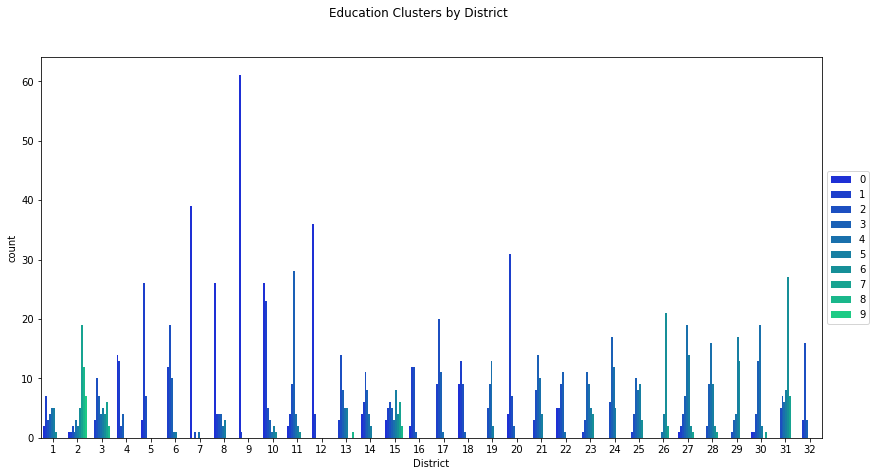

In [291]:
fig,ax = plt.subplots(1, figsize=(14,7))
plt.suptitle('Education Clusters by District')
sns.countplot(x="District", hue="Education Clusters", 
              data=school_explorer, ax=ax, palette='winter')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticklabels(range(1,33));

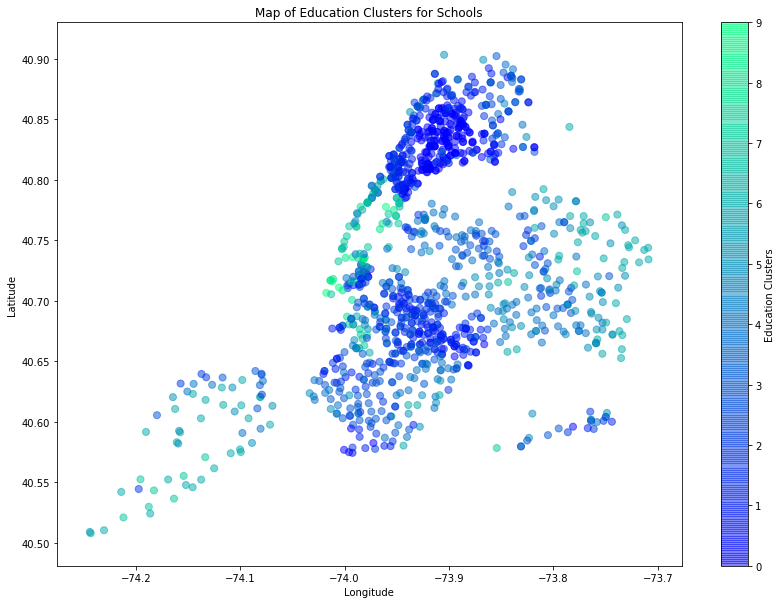

In [292]:
fig,ax = plt.subplots(1, figsize=(14,7))
school_explorer.plot(kind="scatter",x="Longitude", y="Latitude",
                     s=50, c="Education Clusters", ax=ax,
                     title='Map of Education Clusters for Schools',
                     cmap=cm.winter,colorbar=True,alpha=0.5, figsize=(14,10));

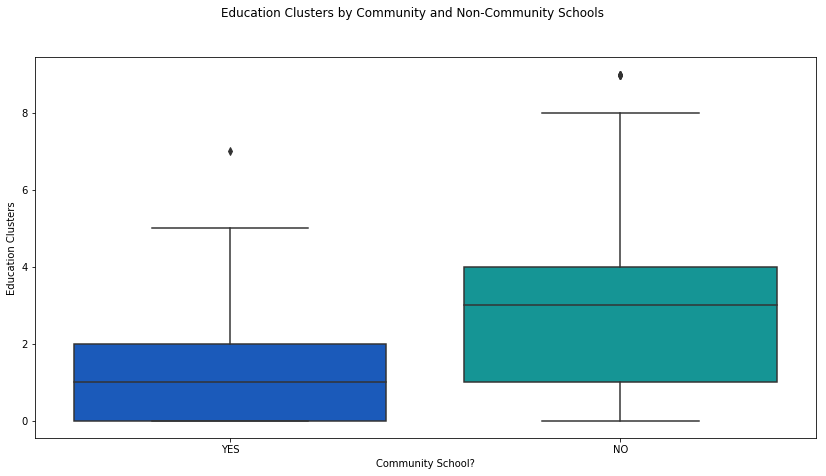

In [293]:
fig,ax = plt.subplots(1, figsize=(14,7))
plt.suptitle('Education Clusters by Community and Non-Community Schools')
sns.boxplot(x="Community School?",y="Education Clusters",
            data=school_explorer, ax=ax, palette='winter')
ax.set_xticklabels(['YES','NO']);

In [301]:
# By education results and social environment
X = school_explorer[['Average ELA Proficiency','Average Math Proficiency',
                     'Student Attendance Rate',
                     'Percent of Students Chronically Absent',                     
                     'Rigorous Instruction %','Collaborative Teachers %',
                     'Supportive Environment %','Effective School Leadership %',
                     'Strong Family-Community Ties %','Trust %']]
n = 10

clf = KMeans(n_clusters=n,random_state=23)
cluster_labels = clf.fit_predict(np.array(X))
school_explorer['Education Clusters'] = cluster_labels

In [302]:
X.groupby(school_explorer['Education Clusters']).mean()\
.sort_values('Average Math Proficiency').T

Education Clusters,6,2,9,7,3,0,5,8,1,4
Average ELA Proficiency,2.167500,2.211531,2.264476,2.386322,2.424588,2.457788,2.664787,2.772572,2.829158,3.174
Average Math Proficiency,2.179958,2.235041,2.286993,2.484872,2.516698,2.564423,2.873698,2.969295,3.069677,3.804
Student Attendance Rate,88.898305,89.754065,91.762238,92.007874,93.272192,93.740385,95.416783,95.855122,95.458717,94.875
Percent of Students Chronically Absent,43.033898,39.609756,29.097902,29.500000,21.879529,20.221154,11.346154,9.483507,11.001395,100.000
Rigorous Instruction %,84.118644,89.337398,85.027972,94.267717,89.541667,82.105769,87.125874,89.677951,94.617852,94.800
Collaborative Teachers %,76.016949,89.995935,82.461538,94.472441,89.283967,71.884615,83.251748,90.825087,95.105997,94.000
Supportive Environment %,82.067797,86.662602,84.223776,93.464567,87.585145,83.125000,87.884615,88.029514,95.046722,91.600
Effective School Leadership %,65.644068,83.467480,73.643357,89.740157,82.967391,59.201923,73.940559,85.463542,90.416318,87.300
Strong Family-Community Ties %,78.983051,83.113821,79.993007,86.984252,82.582428,78.394231,81.286713,81.206597,87.856346,92.500
Trust %,81.101695,91.243902,85.993007,95.330709,91.221467,77.875000,86.597902,91.976997,95.661785,94.000


In [296]:
indices = list(X.groupby(school_explorer['Education Clusters']).mean()\
               .sort_values('Average Math Proficiency').index)
feature_pairs = dict(zip(indices,range(10,20)))
school_explorer['Education Clusters'].replace(feature_pairs,inplace=True)
feature_pairs = dict(zip(range(10,20),range(0,10)))
school_explorer['Education Clusters'].replace(feature_pairs,inplace=True)

In [297]:
X.groupby(school_explorer['Education Clusters']).mean()\
.sort_values('Average Math Proficiency').T

,Average ELA Proficiency,Average Math Proficiency,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
Education Clusters,,,,,,,,,,
0,2.167500,2.179958,88.898305,43.033898,84.118644,76.016949,82.067797,65.644068,78.983051,81.101695
1,2.211531,2.235041,89.754065,39.609756,89.337398,89.995935,86.662602,83.467480,83.113821,91.243902
2,2.264476,2.286993,91.762238,29.097902,85.027972,82.461538,84.223776,73.643357,79.993007,85.993007
3,2.386322,2.484872,92.007874,29.500000,94.267717,94.472441,93.464567,89.740157,86.984252,95.330709
4,2.424588,2.516698,93.272192,21.879529,89.541667,89.283967,87.585145,82.967391,82.582428,91.221467
5,2.457788,2.564423,93.740385,20.221154,82.105769,71.884615,83.125000,59.201923,78.394231,77.875000
6,2.664787,2.873698,95.416783,11.346154,87.125874,83.251748,87.884615,73.940559,81.286713,86.597902
7,2.772572,2.969295,95.855122,9.483507,89.677951,90.825087,88.029514,85.463542,81.206597,91.976997
8,2.829158,3.069677,95.458717,11.001395,94.617852,95.105997,95.046722,90.416318,87.856346,95.661785


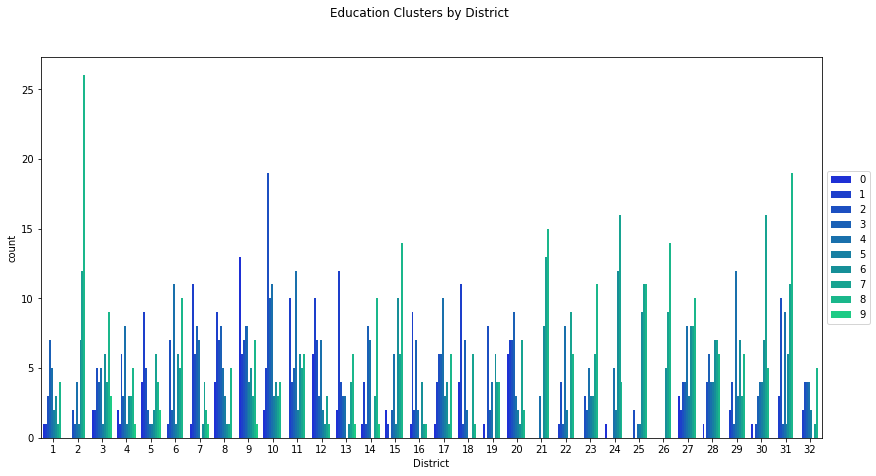

In [298]:
fig,ax = plt.subplots(1, figsize=(14,7))
plt.suptitle('Education Clusters by District')
sns.countplot(x="District", hue="Education Clusters", 
              data=school_explorer, ax=ax, palette='winter')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticklabels(range(1,33));

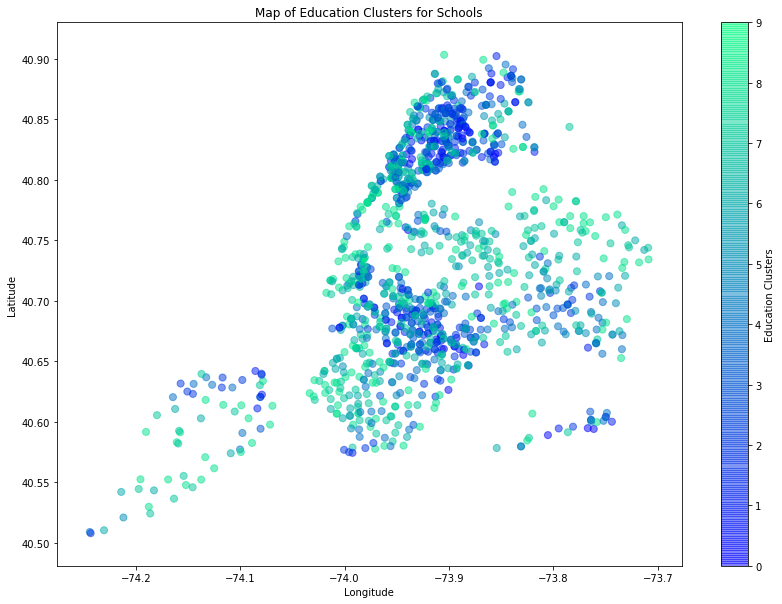

In [299]:
fig,ax = plt.subplots(1, figsize=(14,7))
school_explorer.plot(kind="scatter",x="Longitude", y="Latitude",
                     s=50, c="Education Clusters", ax=ax,
                     title='Map of Education Clusters for Schools',
                     cmap=cm.winter,colorbar=True,alpha=0.5, figsize=(14,10));

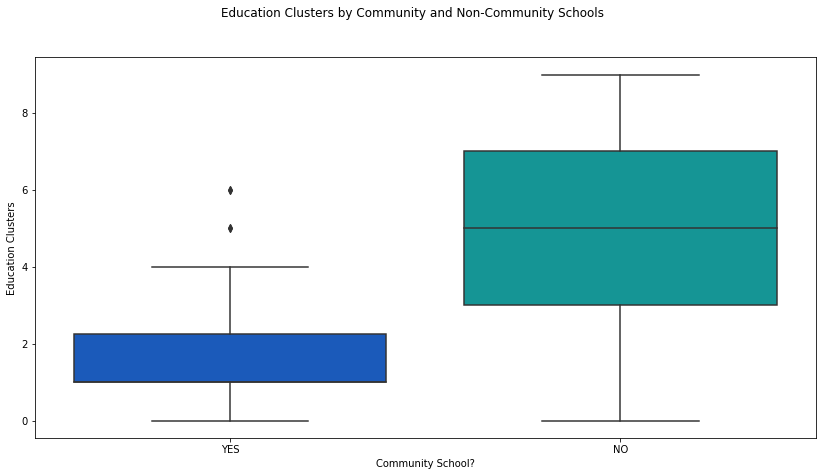

In [300]:
fig,ax = plt.subplots(1, figsize=(14,7))
plt.suptitle('Education Clusters by Community and Non-Community Schools')
sns.boxplot(x="Community School?",y="Education Clusters",
            data=school_explorer, ax=ax, palette='winter')
ax.set_xticklabels(['YES','NO']);

The distribution by clusters has certain differences for two cases but the problem regions are clearly the same.